# Notebook 4: Develop GRU Model

In this notebook, first, it will tokenize and pad the sentences into sequences. And then, it will develop different sequential models by using Tensorflow and Keras.

# Tokenization and padding sequences

In [1]:
# read the csv file which stores sentence and numeric labels
import pandas as pd
df_sent_lab = pd.read_csv("dataset/sen_with_numeric_labels.csv")
df_sent_lab.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,sentences,labels
0,mothercare plc annual report accounts www,0
1,mothercareplc,0
2,com transformation growth,0
3,financial highlights worldwide network sales,0
4,group sales,0


In [2]:
# a short summary of the dataset "df_sent_lab"
sentcount = df_sent_lab["labels"].value_counts()
print("Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):")
print(sentcount)
print(f"\nIs there any missing and null value? Answer: {sentcount.isnull().sum()}")

Print the sentiment summary of the dataset (1 = positive; 0 = neutral; negative = -1):
labels
 1    396692
 0    301895
-1    205911
Name: count, dtype: int64

Is there any missing and null value? Answer: 0


After the above inital screening, it can tokenize the sentences and pad them as sequences.

In [3]:
# Import global nlp functions to tokenize the sentences and pad them as sequences
from nlp_functions import tokenize_pad_sequences

# Global parameters
num_words = 500 # max numbers of vocabulary 
oov_token = '<OOV>' # words that is out of the vocabulary
maxlen = 10 # max length of the sequences
padding = 'post' # padding position
truncating = 'post' # truncation position

# Extract the sentence from the dataset "df_sent_lab"
sentences = df_sent_lab["sentences"]

In [4]:
# Tokenize and padded the sentences
tokenizer, word_index, sequences, padded_sequences = tokenize_pad_sequences(sentences, 
                                                                            num_words, 
                                                                            oov_token, 
                                                                            maxlen,
                                                                            padding, 
                                                                            truncating)

2023-07-25 11:11:25.301408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using the global nlp function to visualise the padded sequences.

In [5]:
# Import global nlp functions for the summary
from nlp_functions import summary_tokpad

# Get the summary of the padded and tokenization for first 10 rows
summary = tokenize_pad_sequences(sentences, num_words, oov_token, maxlen, padding, truncating)
summary_tokpad(summary, 0, 10)

start index: 0
end index: 10
Summary of the tokenization and padding:

Selected Word Index:
<OOV>: 1
group: 2
financial: 3
year: 4
report: 5
company: 6
committee: 7
board: 8
directors: 9
business: 10

Selected Sentences:
[1, 25, 11, 5, 36, 1]
[1]
[395, 1, 81]
[3, 1, 1, 1, 57]
[2, 57]
[62, 253]
[26, 62, 71]
[166, 1]
[253]
[61, 223, 4, 249, 62, 253]

Selected Padded Sequences:
[ 1 25 11  5 36  1  0  0  0  0]
[1 0 0 0 0 0 0 0 0 0]
[395   1  81   0   0   0   0   0   0   0]
[ 3  1  1  1 57  0  0  0  0  0]
[ 2 57  0  0  0  0  0  0  0  0]
[ 62 253   0   0   0   0   0   0   0   0]
[26 62 71  0  0  0  0  0  0  0]
[166   1   0   0   0   0   0   0   0   0]
[253   0   0   0   0   0   0   0   0   0]
[ 61 223   4 249  62 253   0   0   0   0]


# Spliting the dataset

Split the dataset into X_training, X_test, Y_training and Y_test for modelling and validation. 
In details, X_training is training_sequences, X_test is testing_sequences, Y_training is training_labels, Y_test is testing_labels, respectively.

First, it splits the training sequences and testing sequences.

In [6]:
# parameters setting
training_size = 0.8
labels = df_sent_lab["labels"]
sequences = padded_sequences

# Split the sequences into training and testing dataset
from nlp_functions import split_the_dataset
training_sequences, testing_sequences = split_the_dataset(sequences, training_size)

In [7]:
# Print the training sequences dataset
print(f"There are {len(training_sequences)} in the training sequences data.")
print("The following are the training sequences: ")
print(training_sequences)

# Print the testing sequences dataset
print("")
print("")
print(f"There are {len(testing_sequences)} in the testing sequences data.")
print("The following are the testing sequences: ")
print(testing_sequences)

There are 723598 in the training sequences data.
The following are the training sequences: 
[[329   1   1 ... 207 208  22]
 [  1   1   1 ...   1   1   1]
 [ 74  78   1 ...  78   1 203]
 ...
 [ 50   1   1 ...   1   0   0]
 [126 238   1 ...   1   1  45]
 [  1   5 381 ...   0   0   0]]


There are 180900 in the testing sequences data.
The following are the testing sequences: 
[[128   0   0 ...   0   0   0]
 [249 188  19 ...  50 190 273]
 [  1   1   1 ...  23   1  16]
 ...
 [  1   1 201 ...  48   1   1]
 [  1   1   1 ...   1   1 214]
 [ 20  14  90 ...   0   0   0]]


Next, it splits the training lables and testing labels datasets.

In [8]:
# Split the labels into training and testing dataset
training_labels, testing_labels = split_the_dataset(labels, training_size)

In [9]:
# Print the training labels dataset
print(f"There are {len(training_labels)} in the training labels data.")
print("The following are the training labels: ")
print(training_labels)

# Print the testing labels dataset
print("")
print("")
print(f"There are {len(testing_labels)} in the testing labels data.")
print("The following are the testing labels: ")
print(testing_labels)

There are 723598 in the training labels data.
The following are the training labels: 
145206    1
488489    1
333331    1
658478    0
700643    0
         ..
259178    1
365838    0
131932    1
671155    1
121958    0
Name: labels, Length: 723598, dtype: int64


There are 180900 in the testing labels data.
The following are the testing labels: 
347497    0
840078    1
289955   -1
861028    1
901240    1
         ..
758540    1
7624     -1
313781    1
476891    1
240607    1
Name: labels, Length: 180900, dtype: int64


Before developing models, it sets up a global function to visualise the validation during the training and validation process.

In [10]:
import matplotlib.pyplot as plt

# Plot functions
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense, Bidirectional
from tensorflow.keras.models import Sequential

Before specify the model definition, it should covert the label as one-hot encoded format. It can work with categorical_crossentropy loss function as this function only read labels at one-hot encoded format and it cannot process any negative value.

One-hot encoding: It is a process of converting the numeric categorical variables as binary vectors as follows:

-1 = [1,0,0]  
0 = [0,1,0]  
1 = [0,0,1]
. 

In [12]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoding
training_labels_encoded = to_categorical(training_labels, num_classes=3)
testing_labels_encoded = to_categorical(testing_labels, num_classes=3)

Comment: The forth LSTM model "lstm_model_4" has a little enhancement of the training accuracy of 89.8% and validation accuracy of 83.9%. The total training time is approximate 1871 seconds (around 31 mins) for 30 epochs and 128 batch size. The trend of lowering training loss and increasing val_loss cannot be identified after the training. It indicates there is no overfitting problem of the model.

# GRU model

Gated Recurrent Units (GRUs) can be viewed as a simplied version of LSTM due to its simplified model structure such as fewer gates, single hidden state. 

The hyperparameter gru_dim specifies the number of units or dimensions in the GRU layer. Similar to the above LSTM layer, it has simplified architecture to learn dependencies in sequential data but it is not effective in capturing very long-term dependencies such as translation and speech recognition.

Remarks: Long-term dependencies can be defined as the relationship between earlier elements and later elements in the sequences. Since LSTM has memory cells, it allows LSTM models to retain information over longer time than GRU.

## 1st GRU model 

In [13]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
gru_dim = 64 # num of units of GRU
dense_dim = 64 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [14]:
# Import GRU layer from Tensorflow Keras
from tensorflow.keras.layers import GRU

In [15]:
# Build the model
gru_model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_1.summary()

2023-07-25 11:11:57.230637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            32000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49920     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 90,371
Trainable params: 90,371
Non-trainable params: 0
_________________________________________________________________


In [16]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_1_history = gru_model_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 51s 9ms/step - loss: 0.5122 - accuracy: 0.7595 - val_loss: 0.4952 - val_accuracy: 0.7662
Epoch 2/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.4845 - accuracy: 0.7734 - val_loss: 0.4825 - val_accuracy: 0.7750
Epoch 3/30
5654/5654 [==============================] - 48s 9ms/step - loss: 0.4693 - accuracy: 0.7833 - val_loss: 0.4719 - val_accuracy: 0.7811
Epoch 4/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.4532 - accuracy: 0.7935 - val_loss: 0.4591 - val_accuracy: 0.7916
Epoch 5/30
5654/5654 [==============================] - 51s 9ms/step - loss: 0.4365 - accuracy: 0.8042 - val_loss: 0.4498 - val_accuracy: 0.7987
Epoch 6/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.4201 - accuracy: 0.8145 - val_loss: 0.4416 - val_accuracy: 0.8059
Epoch 7/30
5654/5654 [==============================] - 48s 8ms/step - loss: 0.4049 - accuracy: 0.8231 - val_loss: 0.4344 - val_ac

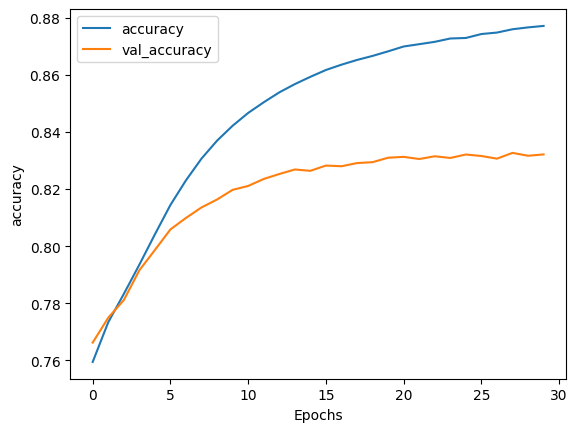

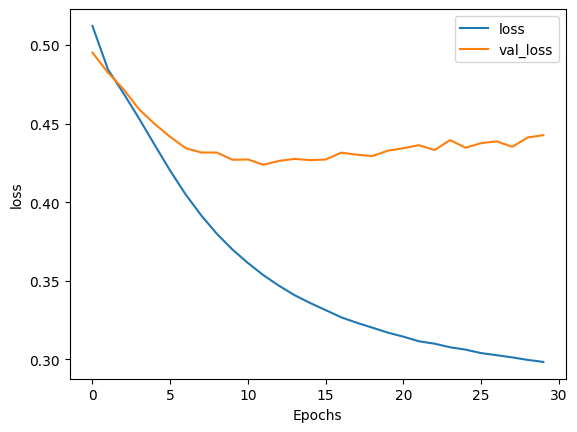

In [17]:
# Plot the accuracy and results 
plot_graphs(gru_model_1_history, "accuracy")
plot_graphs(gru_model_1_history, "loss")

The model "gru_model_1" summary:

1. Training accuracy: 88%
2. Validation accuracy: 83%
3. Total training time: around 24 mins for 30 epochs and 128 batch size.
4. Validation: Pass

Next, it create a dataframe to visualise the comparison of the models.

In [79]:
import pandas as pd

# Data for multiple rows
data = {
    "Models": ["gru_model_1"],
    "Train Acc (%)": [88],
    "Val. Acc (%)": [83],
    "Train Time (mins)": [24],
    "Validation": ["Pass"]
}

# Create a pandas DataFrame
df_comp_models = pd.DataFrame(data)

# Print the table without index numbers
print(df_comp_models.to_string(index=False))

     Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
gru_model_1             88            83                 24       Pass


## 2nd GRU model

In [18]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [19]:
# Build the model
gru_model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 108)              35640     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 54)                5886      
                                                                 
 dense_3 (Dense)             (None, 3)                 165       
                                                                 
Total params: 68,691
Trainable params: 68,691
Non-trainable params: 0
_________________________________________________________________


In [20]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_history = gru_model_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 45s 8ms/step - loss: 0.5144 - accuracy: 0.7587 - val_loss: 0.4958 - val_accuracy: 0.7647
Epoch 2/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4862 - accuracy: 0.7724 - val_loss: 0.4845 - val_accuracy: 0.7745
Epoch 3/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4729 - accuracy: 0.7810 - val_loss: 0.4749 - val_accuracy: 0.7790
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4591 - accuracy: 0.7895 - val_loss: 0.4629 - val_accuracy: 0.7875
Epoch 5/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4451 - accuracy: 0.7985 - val_loss: 0.4556 - val_accuracy: 0.7928
Epoch 6/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4309 - accuracy: 0.8074 - val_loss: 0.4470 - val_accuracy: 0.7996
Epoch 7/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4179 - accuracy: 0.8150 - val_loss: 0.4420 - val_ac

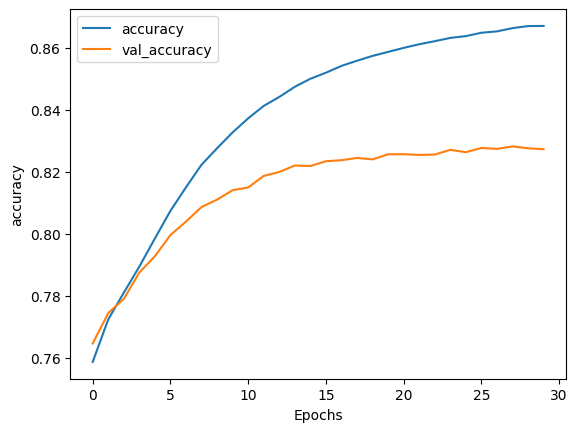

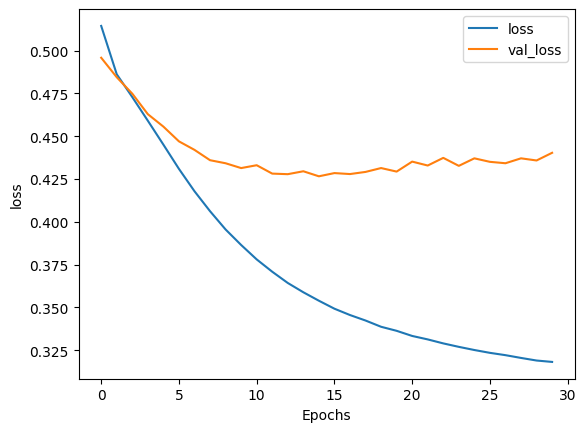

In [21]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_history, "accuracy")
plot_graphs(gru_model_2_history, "loss")

The model "gru_model_2" summary:

1. Training accuracy: 87%
2. Validation accuracy: 83%
3. Total training time: around 21 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [80]:
# Creat a function to add row for the above models
def add_row(df, model, train_acc, val_acc, train_time, validation):
    new_row = {
        "Models": model,
        "Train Acc (%)": train_acc,
        "Val. Acc (%)": val_acc,
        "Train Time (mins)": train_time,
        "Validation": validation
    }
    df.loc[len(df)] = new_row
    return df


In [81]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "gru_model_2", 87, 83, 21, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

     Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
gru_model_1             88            83                 24       Pass
gru_model_2             87            83                 21       Pass


## 3rd GRU model

In [22]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
gru_dim = 44 # num of units of GRU
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [23]:
# Build the model
gru_model_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 44)            22000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 88)               23760     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 44)                3916      
                                                                 
 dense_5 (Dense)             (None, 3)                 135       
                                                                 
Total params: 49,811
Trainable params: 49,811
Non-trainable params: 0
_________________________________________________________________


In [24]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_3_history = gru_model_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 37s 6ms/step - loss: 0.5165 - accuracy: 0.7582 - val_loss: 0.4983 - val_accuracy: 0.7637
Epoch 2/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4885 - accuracy: 0.7715 - val_loss: 0.4873 - val_accuracy: 0.7719
Epoch 3/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4766 - accuracy: 0.7794 - val_loss: 0.4796 - val_accuracy: 0.7778
Epoch 4/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4655 - accuracy: 0.7860 - val_loss: 0.4707 - val_accuracy: 0.7833
Epoch 5/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4544 - accuracy: 0.7931 - val_loss: 0.4631 - val_accuracy: 0.7895
Epoch 6/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4432 - accuracy: 0.7999 - val_loss: 0.4573 - val_accuracy: 0.7933
Epoch 7/30
5654/5654 [==============================] - 34s 6ms/step - loss: 0.4325 - accuracy: 0.8066 - val_loss: 0.4511 - val_ac

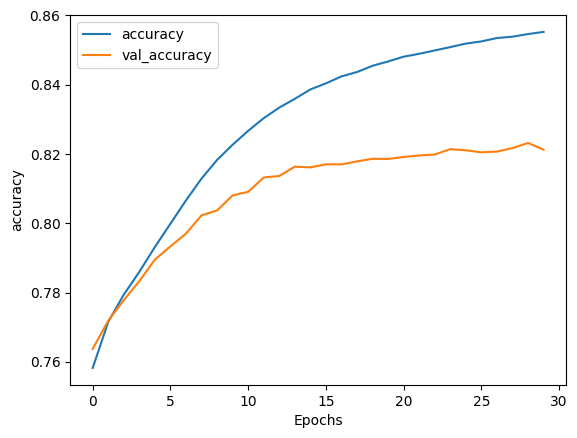

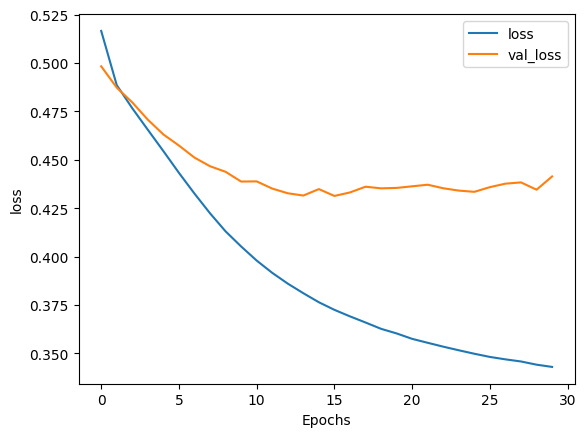

In [25]:
# Plot the accuracy and results 
plot_graphs(gru_model_3_history, "accuracy")
plot_graphs(gru_model_3_history, "loss")

The model "gru_model_3" summary:

1. Training accuracy: 86%
2. Validation accuracy: 82%
3. Total training time: around 17 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [82]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "gru_model_3", 86, 82, 17, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

     Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
gru_model_1             88            83                 24       Pass
gru_model_2             87            83                 21       Pass
gru_model_3             86            82                 17       Pass


## 4th GRU model

In [26]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
gru_dim = 34 # num of units of GRU
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [27]:
# Build the model
gru_model_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 34)            17000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 68)               14280     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 34)                2346      
                                                                 
 dense_7 (Dense)             (None, 3)                 105       
                                                                 
Total params: 33,731
Trainable params: 33,731
Non-trainable params: 0
_________________________________________________________________


In [28]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_4_history = gru_model_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 33s 5ms/step - loss: 0.5186 - accuracy: 0.7566 - val_loss: 0.5003 - val_accuracy: 0.7617
Epoch 2/30
5654/5654 [==============================] - 31s 5ms/step - loss: 0.4921 - accuracy: 0.7686 - val_loss: 0.4902 - val_accuracy: 0.7693
Epoch 3/30
5654/5654 [==============================] - 31s 5ms/step - loss: 0.4820 - accuracy: 0.7749 - val_loss: 0.4840 - val_accuracy: 0.7730
Epoch 4/30
5654/5654 [==============================] - 30s 5ms/step - loss: 0.4728 - accuracy: 0.7812 - val_loss: 0.4764 - val_accuracy: 0.7789
Epoch 5/30
5654/5654 [==============================] - 30s 5ms/step - loss: 0.4638 - accuracy: 0.7868 - val_loss: 0.4701 - val_accuracy: 0.7833
Epoch 6/30
5654/5654 [==============================] - 31s 5ms/step - loss: 0.4552 - accuracy: 0.7921 - val_loss: 0.4650 - val_accuracy: 0.7880
Epoch 7/30
5654/5654 [==============================] - 30s 5ms/step - loss: 0.4466 - accuracy: 0.7980 - val_loss: 0.4589 - val_ac

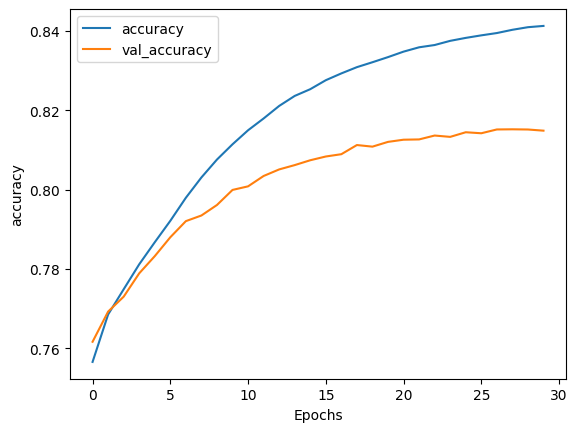

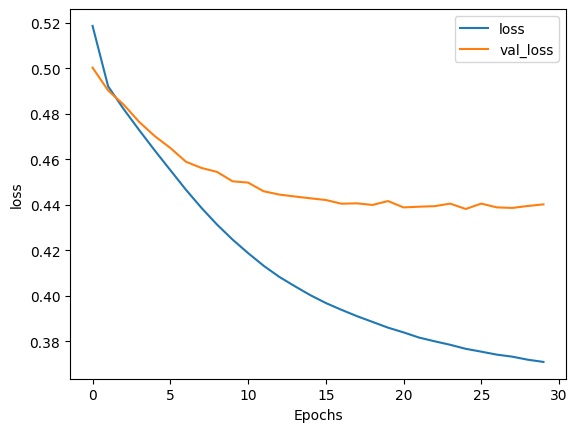

In [29]:
# Plot the accuracy and results 
plot_graphs(gru_model_4_history, "accuracy")
plot_graphs(gru_model_4_history, "loss")

The model "gru_model_4" summary:

1. Training accuracy: 84%
2. Validation accuracy: 81%
3. Total training time: around 15 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [83]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "gru_model_4", 84, 81, 15, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

     Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
gru_model_1             88            83                 24       Pass
gru_model_2             87            83                 21       Pass
gru_model_3             86            82                 17       Pass
gru_model_4             84            81                 15       Pass


## 5th GRU model

In [30]:
# Hyperparameters
embedding_dim = 24 # each word will be represented by a dense vextor of specified size
gru_dim = 24 # num of units of GRU
dense_dim = 24 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [31]:
# Build the model
gru_model_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 24)            12000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 48)               7200      
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 24)                1176      
                                                                 
 dense_9 (Dense)             (None, 3)                 75        
                                                                 
Total params: 20,451
Trainable params: 20,451
Non-trainable params: 0
_________________________________________________________________


In [32]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_5_history = gru_model_5.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.5254 - accuracy: 0.7545 - val_loss: 0.5027 - val_accuracy: 0.7604
Epoch 2/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4949 - accuracy: 0.7671 - val_loss: 0.4943 - val_accuracy: 0.7671
Epoch 3/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4867 - accuracy: 0.7722 - val_loss: 0.4887 - val_accuracy: 0.7708
Epoch 4/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4794 - accuracy: 0.7769 - val_loss: 0.4825 - val_accuracy: 0.7754
Epoch 5/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4728 - accuracy: 0.7813 - val_loss: 0.4777 - val_accuracy: 0.7785
Epoch 6/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4669 - accuracy: 0.7849 - val_loss: 0.4740 - val_accuracy: 0.7816
Epoch 7/30
5654/5654 [==============================] - 27s 5ms/step - loss: 0.4617 - accuracy: 0.7886 - val_loss: 0.4707 - val_ac

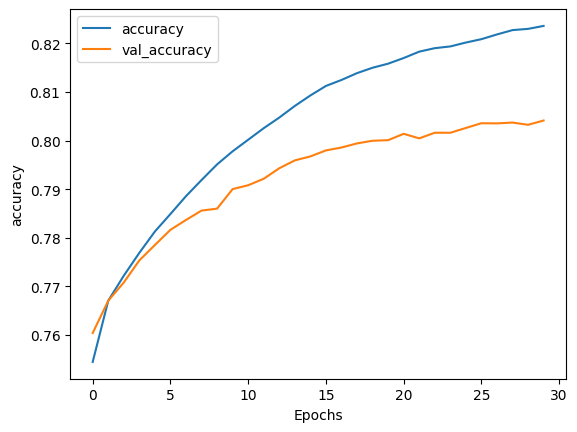

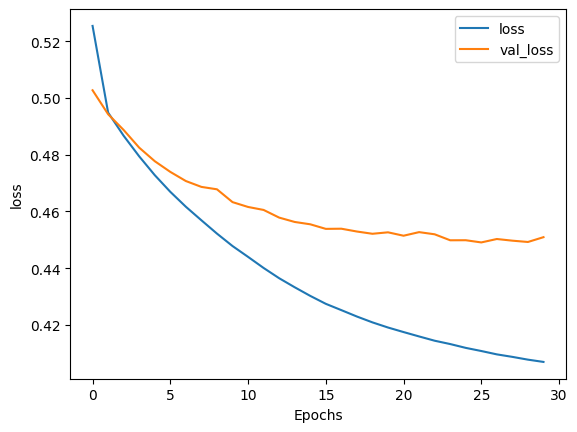

In [33]:
# Plot the accuracy and results 
plot_graphs(gru_model_5_history, "accuracy")
plot_graphs(gru_model_5_history, "loss")

The model "gru_model_5" summary:

1. Training accuracy: 82%
2. Validation accuracy: 80%
3. Total training time: around 13 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [84]:
# Call the function to add a new row
df_comp_models = add_row(df_comp_models, "gru_model_5", 82, 80, 13, "Pass")

# Print the updated DataFrame
print(df_comp_models.to_string(index=False))

     Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
gru_model_1             88            83                 24       Pass
gru_model_2             87            83                 21       Pass
gru_model_3             86            82                 17       Pass
gru_model_4             84            81                 15       Pass
gru_model_5             82            80                 13       Pass


Overall, the "gru_model_2" is the most efficient model with higher training and validation accuracy.

# Model Optimization

First, it will adjust gru_model_2 model's hyperparameter to find any possible replacement model with best performance and lowest training cost. First, it will adjust the gru_dim units.

## GRU 2.1 model

In [34]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 64 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [35]:
# Build the model
gru_model_2_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              46080     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 54)                6966      
                                                                 
 dense_11 (Dense)            (None, 3)                 165       
                                                                 
Total params: 80,211
Trainable params: 80,211
Non-trainable params: 0
_________________________________________________________________


In [36]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_1_history = gru_model_2_1.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 49s 8ms/step - loss: 0.5138 - accuracy: 0.7591 - val_loss: 0.4959 - val_accuracy: 0.7655
Epoch 2/30
5654/5654 [==============================] - 47s 8ms/step - loss: 0.4858 - accuracy: 0.7728 - val_loss: 0.4844 - val_accuracy: 0.7742
Epoch 3/30
5654/5654 [==============================] - 47s 8ms/step - loss: 0.4717 - accuracy: 0.7820 - val_loss: 0.4756 - val_accuracy: 0.7797
Epoch 4/30
5654/5654 [==============================] - 47s 8ms/step - loss: 0.4575 - accuracy: 0.7904 - val_loss: 0.4630 - val_accuracy: 0.7877
Epoch 5/30
5654/5654 [==============================] - 47s 8ms/step - loss: 0.4426 - accuracy: 0.8003 - val_loss: 0.4524 - val_accuracy: 0.7951
Epoch 6/30
5654/5654 [==============================] - 47s 8ms/step - loss: 0.4276 - accuracy: 0.8098 - val_loss: 0.4437 - val_accuracy: 0.8017
Epoch 7/30
5654/5654 [==============================] - 47s 8ms/step - loss: 0.4132 - accuracy: 0.8180 - val_loss: 0.4374 - val_ac

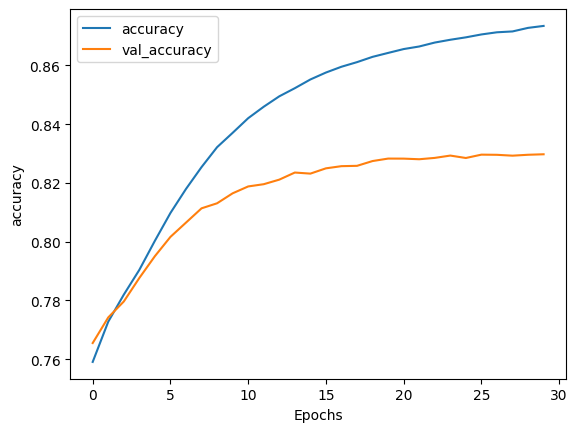

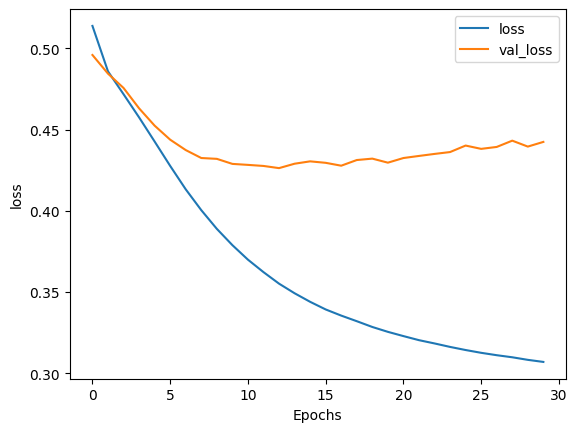

In [37]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_1_history, "accuracy")
plot_graphs(gru_model_2_1_history, "loss")

The model "gru_model_2_1" summary:

1. Training accuracy: 87%
2. Validation accuracy: 83%
3. Total training time: around 23 mins for 30 epochs and 128 batch size.
4. Validation: Pass

Create a dataframe for model comparison:

In [88]:
# Data
data = {
    "Models": ["gru_model_2"],
    "Train Acc (%)": [87],
    "Val. Acc (%)": [83],
    "Train Time (mins)": [21],
    "Validation": ["Pass"]
}

# Create a pandas DataFrame
df_opt_models = pd.DataFrame(data)

In [89]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_1", 87, 83, 23, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass


## GRU 2.2 model

In [38]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 34 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [39]:
# Build the model
gru_model_2_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_6 (Bidirectio  (None, 68)               18360     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 54)                3726      
                                                                 
 dense_13 (Dense)            (None, 3)                 165       
                                                                 
Total params: 49,251
Trainable params: 49,251
Non-trainable params: 0
_________________________________________________________________


In [40]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_2_history = gru_model_2_2.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 35s 6ms/step - loss: 0.5146 - accuracy: 0.7586 - val_loss: 0.4959 - val_accuracy: 0.7654
Epoch 2/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4869 - accuracy: 0.7721 - val_loss: 0.4865 - val_accuracy: 0.7713
Epoch 3/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4746 - accuracy: 0.7798 - val_loss: 0.4784 - val_accuracy: 0.7773
Epoch 4/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4634 - accuracy: 0.7867 - val_loss: 0.4684 - val_accuracy: 0.7832
Epoch 5/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4528 - accuracy: 0.7936 - val_loss: 0.4619 - val_accuracy: 0.7894
Epoch 6/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4571 - val_accuracy: 0.7933
Epoch 7/30
5654/5654 [==============================] - 32s 6ms/step - loss: 0.4329 - accuracy: 0.8062 - val_loss: 0.4518 - val_ac

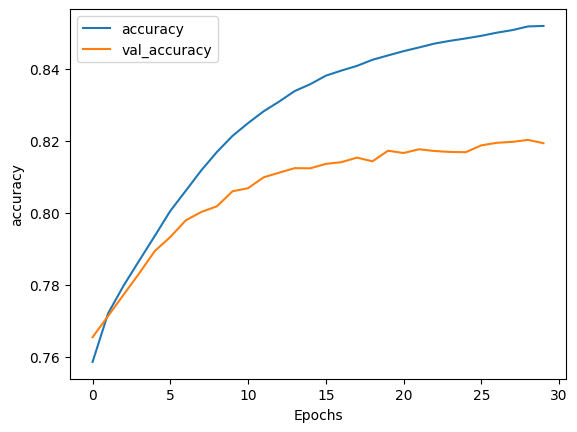

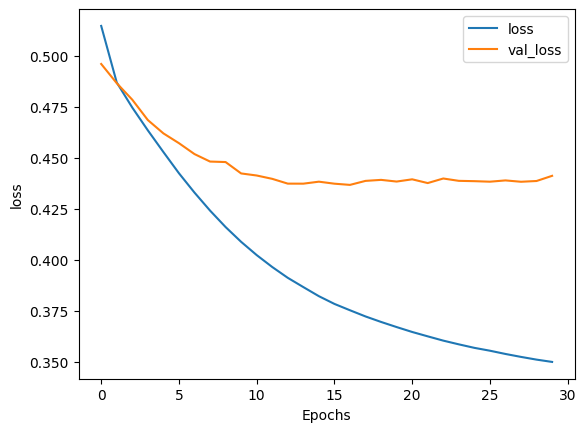

In [41]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_2_history, "accuracy")
plot_graphs(gru_model_2_2_history, "loss")

The model "gru_model_2_2" summary:

1. Training accuracy: 85%
2. Validation accuracy: 82%
3. Total training time: around 16 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [90]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_2", 85, 82, 16, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass


## GRU 2.3 model

In [42]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 24 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [43]:
# Build the model
gru_model_2_3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 10, 54)            27000     
                                                                 
 bidirectional_7 (Bidirectio  (None, 48)               11520     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 54)                2646      
                                                                 
 dense_15 (Dense)            (None, 3)                 165       
                                                                 
Total params: 41,331
Trainable params: 41,331
Non-trainable params: 0
_________________________________________________________________


In [44]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_3_history = gru_model_2_3.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 31s 5ms/step - loss: 0.5157 - accuracy: 0.7584 - val_loss: 0.4974 - val_accuracy: 0.7638
Epoch 2/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4882 - accuracy: 0.7714 - val_loss: 0.4871 - val_accuracy: 0.7722
Epoch 3/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4761 - accuracy: 0.7793 - val_loss: 0.4795 - val_accuracy: 0.7770
Epoch 4/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4657 - accuracy: 0.7859 - val_loss: 0.4701 - val_accuracy: 0.7841
Epoch 5/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4559 - accuracy: 0.7919 - val_loss: 0.4637 - val_accuracy: 0.7879
Epoch 6/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4470 - accuracy: 0.7974 - val_loss: 0.4603 - val_accuracy: 0.7910
Epoch 7/30
5654/5654 [==============================] - 29s 5ms/step - loss: 0.4391 - accuracy: 0.8029 - val_loss: 0.4556 - val_ac

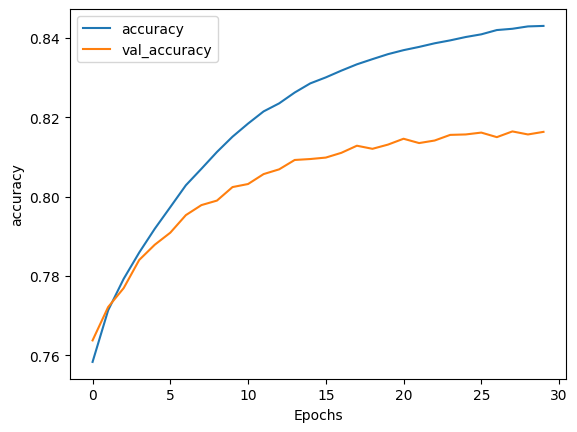

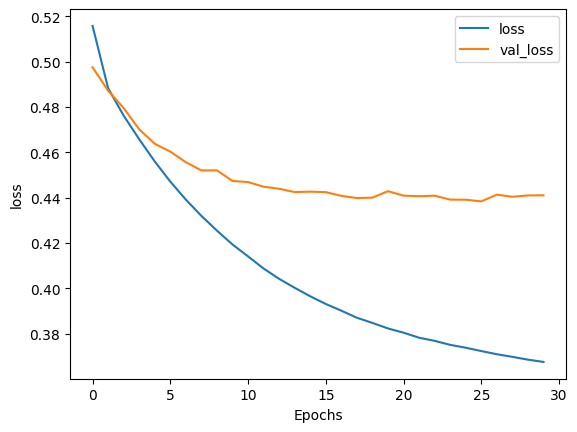

In [45]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_3_history, "accuracy")
plot_graphs(gru_model_2_3_history, "loss")

The model "gru_model_2_3" summary:

1. Training accuracy: 84%
2. Validation accuracy: 82%
3. Total training time: around 14 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [91]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_3", 84, 82, 14, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass
gru_model_2_3             84            82                 14       Pass


Next, it will adjust the embedding_dim hyperparameter.

## GRU 2.4 model

In [46]:
# Hyperparameters
embedding_dim = 64 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [47]:
# Build the model
gru_model_2_4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 10, 64)            32000     
                                                                 
 bidirectional_8 (Bidirectio  (None, 108)              38880     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 54)                5886      
                                                                 
 dense_17 (Dense)            (None, 3)                 165       
                                                                 
Total params: 76,931
Trainable params: 76,931
Non-trainable params: 0
_________________________________________________________________


In [48]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_4_history = gru_model_2_4.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 46s 8ms/step - loss: 0.5135 - accuracy: 0.7590 - val_loss: 0.4944 - val_accuracy: 0.7668
Epoch 2/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4848 - accuracy: 0.7737 - val_loss: 0.4831 - val_accuracy: 0.7749
Epoch 3/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4700 - accuracy: 0.7837 - val_loss: 0.4730 - val_accuracy: 0.7822
Epoch 4/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4549 - accuracy: 0.7934 - val_loss: 0.4606 - val_accuracy: 0.7901
Epoch 5/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4395 - accuracy: 0.8029 - val_loss: 0.4511 - val_accuracy: 0.7971
Epoch 6/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4250 - accuracy: 0.8114 - val_loss: 0.4439 - val_accuracy: 0.8027
Epoch 7/30
5654/5654 [==============================] - 43s 8ms/step - loss: 0.4114 - accuracy: 0.8195 - val_loss: 0.4395 - val_ac

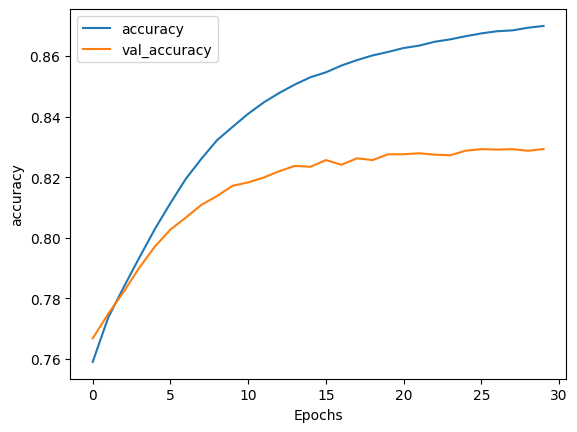

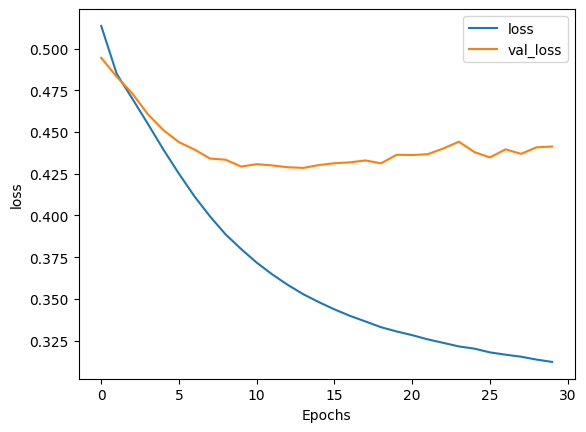

In [49]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_4_history, "accuracy")
plot_graphs(gru_model_2_4_history, "loss")

The model "gru_model_2_4" summary:

1. Training accuracy: 87%
2. Validation accuracy: 83%
3. Total training time: around 21 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [92]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_4", 87, 83, 21, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass
gru_model_2_3             84            82                 14       Pass
gru_model_2_4             87            83                 21       Pass


## GRU 2.5 model

In [50]:
# Hyperparameters
embedding_dim = 44 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [51]:
# Build the model
gru_model_2_5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 44)            22000     
                                                                 
 bidirectional_9 (Bidirectio  (None, 108)              32400     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 54)                5886      
                                                                 
 dense_19 (Dense)            (None, 3)                 165       
                                                                 
Total params: 60,451
Trainable params: 60,451
Non-trainable params: 0
_________________________________________________________________


In [52]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_5_history = gru_model_2_5.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 43s 7ms/step - loss: 0.5149 - accuracy: 0.7583 - val_loss: 0.4990 - val_accuracy: 0.7632
Epoch 2/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4887 - accuracy: 0.7709 - val_loss: 0.4864 - val_accuracy: 0.7731
Epoch 3/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4746 - accuracy: 0.7796 - val_loss: 0.4768 - val_accuracy: 0.7789
Epoch 4/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4617 - accuracy: 0.7879 - val_loss: 0.4663 - val_accuracy: 0.7857
Epoch 5/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4488 - accuracy: 0.7963 - val_loss: 0.4585 - val_accuracy: 0.7909
Epoch 6/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4359 - accuracy: 0.8041 - val_loss: 0.4509 - val_accuracy: 0.7976
Epoch 7/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.4233 - accuracy: 0.8122 - val_loss: 0.4457 - val_ac

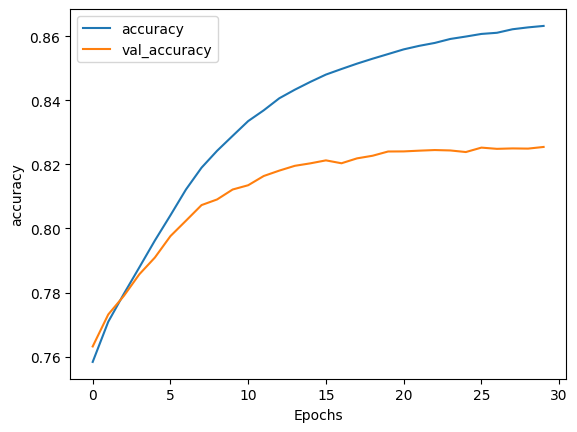

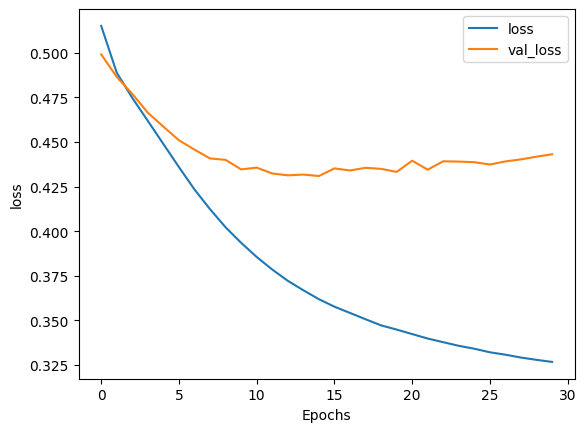

In [53]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_5_history, "accuracy")
plot_graphs(gru_model_2_5_history, "loss")

The model "gru_model_2_5" summary:

1. Training accuracy: 86%
2. Validation accuracy: 83%
3. Total training time: around 20 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [93]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_5", 86, 83, 20, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass
gru_model_2_3             84            82                 14       Pass
gru_model_2_4             87            83                 21       Pass
gru_model_2_5             86            83                 20       Pass


## GRU 2.6 model

In [54]:
# Hyperparameters
embedding_dim = 34 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [55]:
# Build the model
gru_model_2_6 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 34)            17000     
                                                                 
 bidirectional_10 (Bidirecti  (None, 108)              29160     
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 54)                5886      
                                                                 
 dense_21 (Dense)            (None, 3)                 165       
                                                                 
Total params: 52,211
Trainable params: 52,211
Non-trainable params: 0
_________________________________________________________________


In [56]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_6_history = gru_model_2_6.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 41s 7ms/step - loss: 0.5178 - accuracy: 0.7577 - val_loss: 0.5005 - val_accuracy: 0.7617
Epoch 2/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4904 - accuracy: 0.7702 - val_loss: 0.4887 - val_accuracy: 0.7721
Epoch 3/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4787 - accuracy: 0.7772 - val_loss: 0.4808 - val_accuracy: 0.7760
Epoch 4/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4675 - accuracy: 0.7842 - val_loss: 0.4697 - val_accuracy: 0.7827
Epoch 5/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4560 - accuracy: 0.7915 - val_loss: 0.4619 - val_accuracy: 0.7883
Epoch 6/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4442 - accuracy: 0.7990 - val_loss: 0.4551 - val_accuracy: 0.7944
Epoch 7/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4328 - accuracy: 0.8060 - val_loss: 0.4494 - val_ac

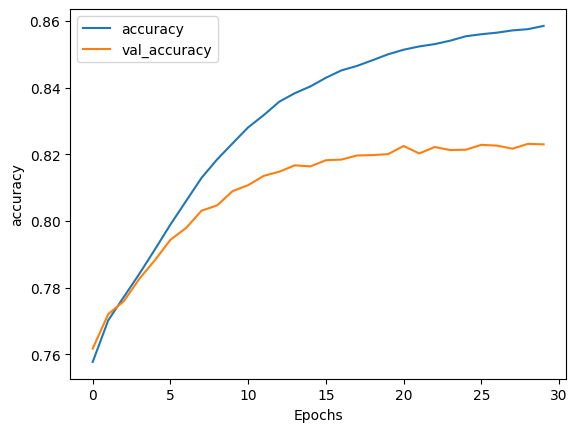

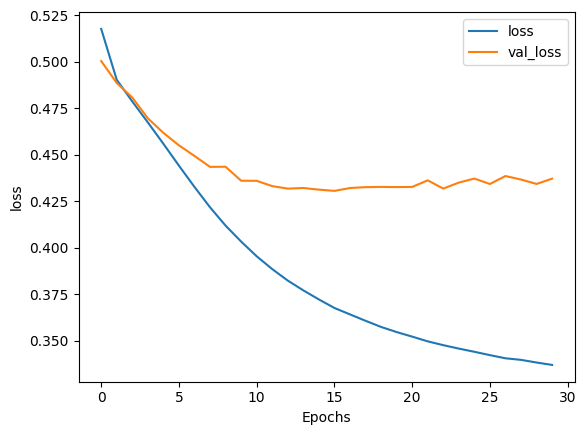

In [57]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_6_history, "accuracy")
plot_graphs(gru_model_2_6_history, "loss")

The model "gru_model_2_6" summary:

1. Training accuracy: 86%
2. Validation accuracy: 82%
3. Total training time: around 19 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [94]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_6", 86, 82, 19, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass
gru_model_2_3             84            82                 14       Pass
gru_model_2_4             87            83                 21       Pass
gru_model_2_5             86            83                 20       Pass
gru_model_2_6             86            82                 19       Pass


## GRU 2.7 model

In [58]:
# Hyperparameters
embedding_dim = 24 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 54 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [59]:
# Build the model
gru_model_2_7 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 10, 24)            12000     
                                                                 
 bidirectional_11 (Bidirecti  (None, 108)              25920     
 onal)                                                           
                                                                 
 dense_22 (Dense)            (None, 54)                5886      
                                                                 
 dense_23 (Dense)            (None, 3)                 165       
                                                                 
Total params: 43,971
Trainable params: 43,971
Non-trainable params: 0
_________________________________________________________________


In [60]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_7_history = gru_model_2_7.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 40s 7ms/step - loss: 0.5196 - accuracy: 0.7566 - val_loss: 0.5011 - val_accuracy: 0.7612
Epoch 2/30
5654/5654 [==============================] - 38s 7ms/step - loss: 0.4925 - accuracy: 0.7688 - val_loss: 0.4900 - val_accuracy: 0.7698
Epoch 3/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4821 - accuracy: 0.7752 - val_loss: 0.4846 - val_accuracy: 0.7733
Epoch 4/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4721 - accuracy: 0.7811 - val_loss: 0.4748 - val_accuracy: 0.7798
Epoch 5/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4621 - accuracy: 0.7877 - val_loss: 0.4686 - val_accuracy: 0.7851
Epoch 6/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4520 - accuracy: 0.7939 - val_loss: 0.4631 - val_accuracy: 0.7887
Epoch 7/30
5654/5654 [==============================] - 39s 7ms/step - loss: 0.4421 - accuracy: 0.7999 - val_loss: 0.4575 - val_ac

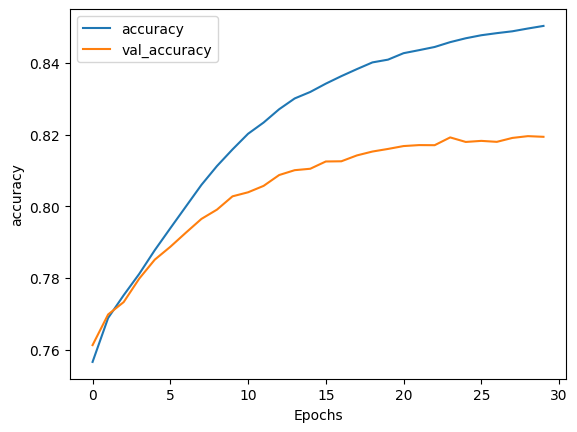

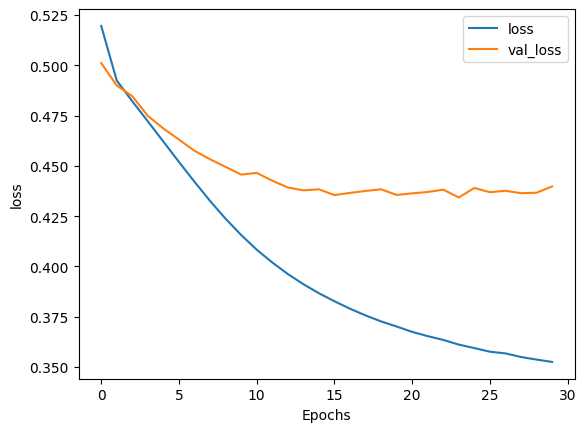

In [61]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_7_history, "accuracy")
plot_graphs(gru_model_2_7_history, "loss")

The model "gru_model_2_7" summary:

1. Training accuracy: 85%
2. Validation accuracy: 82%
3. Total training time: around 19 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [95]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_7", 85, 82, 19, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass
gru_model_2_3             84            82                 14       Pass
gru_model_2_4             87            83                 21       Pass
gru_model_2_5             86            83                 20       Pass
gru_model_2_6             86            82                 19       Pass
gru_model_2_7             85            82                 19       Pass


Next, it will adjust the dense layer hyperparameter.

## GRU 2.8 model

In [62]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 64 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [63]:
# Build the model
gru_model_2_8 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_12 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 64)                6976      
                                                                 
 dense_25 (Dense)            (None, 3)                 195       
                                                                 
Total params: 69,811
Trainable params: 69,811
Non-trainable params: 0
_________________________________________________________________


In [64]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_8_history = gru_model_2_8.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 44s 7ms/step - loss: 0.5138 - accuracy: 0.7590 - val_loss: 0.4973 - val_accuracy: 0.7639
Epoch 2/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4867 - accuracy: 0.7721 - val_loss: 0.4852 - val_accuracy: 0.7740
Epoch 3/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4731 - accuracy: 0.7812 - val_loss: 0.4765 - val_accuracy: 0.7801
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4593 - accuracy: 0.7905 - val_loss: 0.4630 - val_accuracy: 0.7887
Epoch 5/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4447 - accuracy: 0.7993 - val_loss: 0.4534 - val_accuracy: 0.7954
Epoch 6/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4303 - accuracy: 0.8082 - val_loss: 0.4465 - val_accuracy: 0.8009
Epoch 7/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4169 - accuracy: 0.8160 - val_loss: 0.4419 - val_ac

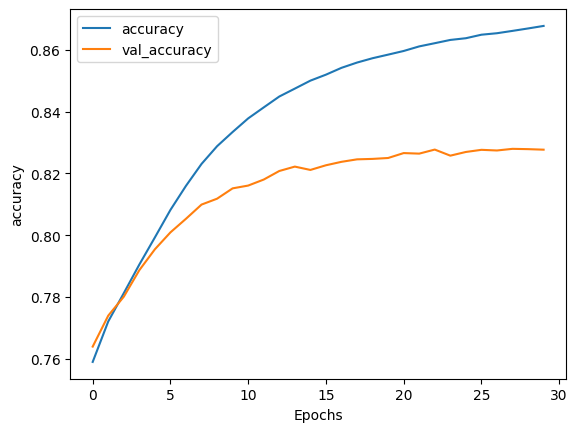

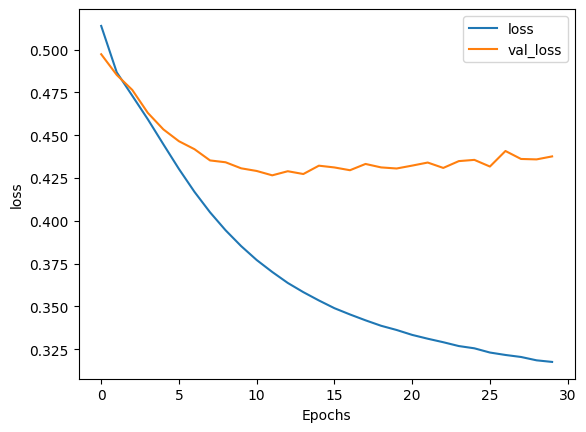

In [65]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_8_history, "accuracy")
plot_graphs(gru_model_2_8_history, "loss")

The model "gru_model_2_8" summary:

1. Training accuracy: 87%
2. Validation accuracy: 83%
3. Total training time: around 21 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [96]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_8", 87, 83, 21, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass
gru_model_2_3             84            82                 14       Pass
gru_model_2_4             87            83                 21       Pass
gru_model_2_5             86            83                 20       Pass
gru_model_2_6             86            82                 19       Pass
gru_model_2_7             85            82                 19       Pass
gru_model_2_8             87            83                 21       Pass


## GRU 2.9 model

In [66]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 44 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [67]:
# Build the model
gru_model_2_9 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_9.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_13 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 44)                4796      
                                                                 
 dense_27 (Dense)            (None, 3)                 135       
                                                                 
Total params: 67,571
Trainable params: 67,571
Non-trainable params: 0
_________________________________________________________________


In [68]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_9_history = gru_model_2_9.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 44s 7ms/step - loss: 0.5142 - accuracy: 0.7584 - val_loss: 0.4964 - val_accuracy: 0.7651
Epoch 2/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4869 - accuracy: 0.7716 - val_loss: 0.4848 - val_accuracy: 0.7735
Epoch 3/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4732 - accuracy: 0.7804 - val_loss: 0.4764 - val_accuracy: 0.7794
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4594 - accuracy: 0.7890 - val_loss: 0.4643 - val_accuracy: 0.7871
Epoch 5/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4452 - accuracy: 0.7981 - val_loss: 0.4542 - val_accuracy: 0.7946
Epoch 6/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4315 - accuracy: 0.8069 - val_loss: 0.4484 - val_accuracy: 0.7998
Epoch 7/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4189 - accuracy: 0.8143 - val_loss: 0.4435 - val_ac

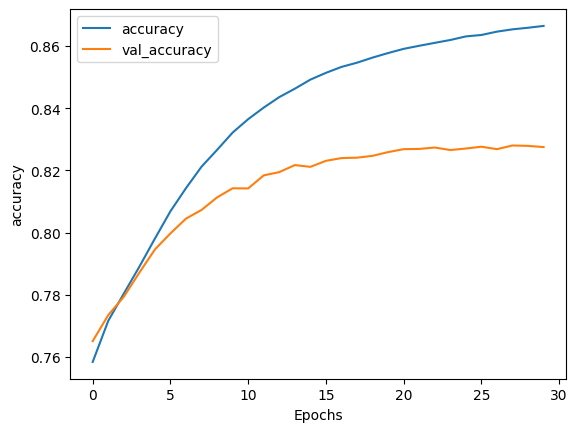

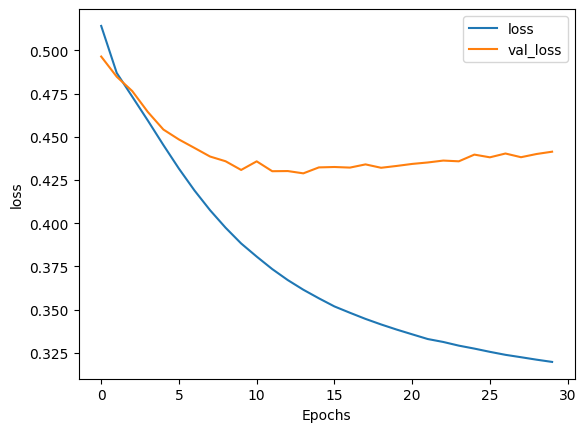

In [70]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_9_history, "accuracy")
plot_graphs(gru_model_2_9_history, "loss")

The model "gru_model_2_9" summary:

1. Training accuracy: 87%
2. Validation accuracy: 83%
3. Total training time: around 21 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [97]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_9", 87, 83, 21, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

       Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
  gru_model_2             87            83                 21       Pass
gru_model_2_1             87            83                 23       Pass
gru_model_2_2             85            82                 16       Pass
gru_model_2_3             84            82                 14       Pass
gru_model_2_4             87            83                 21       Pass
gru_model_2_5             86            83                 20       Pass
gru_model_2_6             86            82                 19       Pass
gru_model_2_7             85            82                 19       Pass
gru_model_2_8             87            83                 21       Pass
gru_model_2_9             87            83                 21       Pass


## GRU 2.10 model

In [71]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 34 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [72]:
# Build the model
gru_model_2_10 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_10.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_14 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 34)                3706      
                                                                 
 dense_29 (Dense)            (None, 3)                 105       
                                                                 
Total params: 66,451
Trainable params: 66,451
Non-trainable params: 0
_________________________________________________________________


In [73]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_10_history = gru_model_2_10.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 45s 8ms/step - loss: 0.5142 - accuracy: 0.7589 - val_loss: 0.4974 - val_accuracy: 0.7648
Epoch 2/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4872 - accuracy: 0.7721 - val_loss: 0.4846 - val_accuracy: 0.7741
Epoch 3/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4741 - accuracy: 0.7805 - val_loss: 0.4779 - val_accuracy: 0.7792
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4609 - accuracy: 0.7888 - val_loss: 0.4654 - val_accuracy: 0.7871
Epoch 5/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4473 - accuracy: 0.7972 - val_loss: 0.4563 - val_accuracy: 0.7938
Epoch 6/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4339 - accuracy: 0.8057 - val_loss: 0.4495 - val_accuracy: 0.7989
Epoch 7/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4215 - accuracy: 0.8129 - val_loss: 0.4429 - val_ac

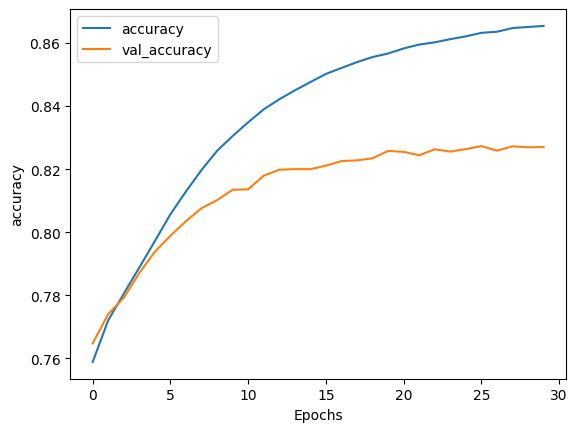

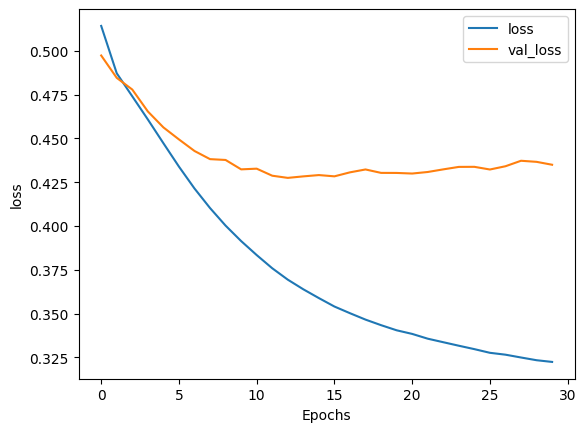

In [74]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_10_history, "accuracy")
plot_graphs(gru_model_2_10_history, "loss")

The model "gru_model_2_10" summary:

1. Training accuracy: 87%
2. Validation accuracy: 83%
3. Total training time: around 21 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [98]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_10", 87, 83, 21, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   gru_model_2             87            83                 21       Pass
 gru_model_2_1             87            83                 23       Pass
 gru_model_2_2             85            82                 16       Pass
 gru_model_2_3             84            82                 14       Pass
 gru_model_2_4             87            83                 21       Pass
 gru_model_2_5             86            83                 20       Pass
 gru_model_2_6             86            82                 19       Pass
 gru_model_2_7             85            82                 19       Pass
 gru_model_2_8             87            83                 21       Pass
 gru_model_2_9             87            83                 21       Pass
gru_model_2_10             87            83                 21       Pass


## GRU 2.11 model

In [75]:
# Hyperparameters
embedding_dim = 54 # each word will be represented by a dense vextor of specified size
gru_dim = 54 # num of units of GRU
dense_dim = 24 # number of units intermediate dense layer
maxlen = 10 # length of the input sequences

In [76]:
# Build the model
gru_model_2_11 = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# Set the training parameters
# Using categorical_crossentropy for classification of positive, netural, and negative sentiment
gru_model_2_11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
gru_model_2_11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 10, 54)            27000     
                                                                 
 bidirectional_15 (Bidirecti  (None, 108)              35640     
 onal)                                                           
                                                                 
 dense_30 (Dense)            (None, 24)                2616      
                                                                 
 dense_31 (Dense)            (None, 3)                 75        
                                                                 
Total params: 65,331
Trainable params: 65,331
Non-trainable params: 0
_________________________________________________________________


In [77]:
# set seed
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

# Setting epochs and batch size
NUM_EPOCHS = 30
BATCH_SIZE = 128

# Fit the model
gru_model_2_11_history = gru_model_2_11.fit(training_sequences, training_labels_encoded,
                         epochs=NUM_EPOCHS,
                         batch_size = BATCH_SIZE,
                         validation_data = (testing_sequences, testing_labels_encoded))

Epoch 1/30
5654/5654 [==============================] - 44s 7ms/step - loss: 0.5148 - accuracy: 0.7588 - val_loss: 0.4978 - val_accuracy: 0.7640
Epoch 2/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4873 - accuracy: 0.7717 - val_loss: 0.4841 - val_accuracy: 0.7732
Epoch 3/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4739 - accuracy: 0.7803 - val_loss: 0.4775 - val_accuracy: 0.7792
Epoch 4/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4608 - accuracy: 0.7884 - val_loss: 0.4644 - val_accuracy: 0.7869
Epoch 5/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4474 - accuracy: 0.7966 - val_loss: 0.4557 - val_accuracy: 0.7929
Epoch 6/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4338 - accuracy: 0.8051 - val_loss: 0.4485 - val_accuracy: 0.7979
Epoch 7/30
5654/5654 [==============================] - 42s 7ms/step - loss: 0.4210 - accuracy: 0.8129 - val_loss: 0.4432 - val_ac

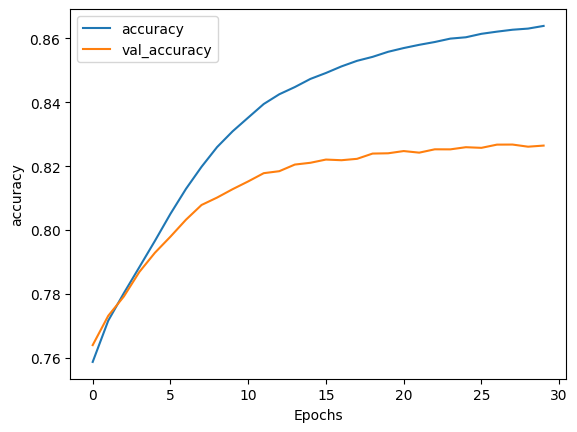

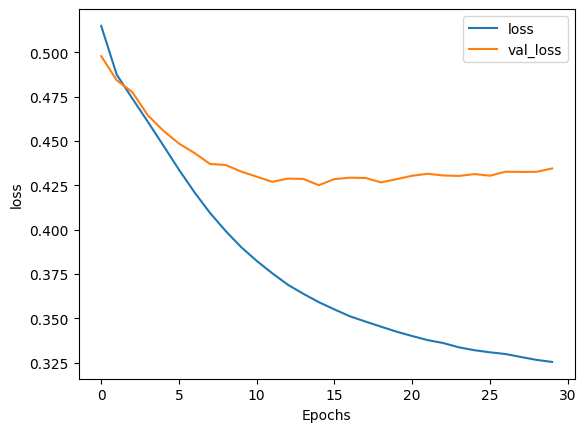

In [78]:
# Plot the accuracy and results 
plot_graphs(gru_model_2_11_history, "accuracy")
plot_graphs(gru_model_2_11_history, "loss")

The model "gru_model_2_11" summary:

1. Training accuracy: 86%
2. Validation accuracy: 83%
3. Total training time: around 21 mins for 30 epochs and 128 batch size.
4. Validation: Pass

In [99]:
# add a new row
df_opt_models = add_row(df_opt_models, "gru_model_2_11", 87, 83, 21, "Pass")

# Print the updated DataFrame
print(df_opt_models.to_string(index=False))

        Models  Train Acc (%)  Val. Acc (%)  Train Time (mins) Validation
   gru_model_2             87            83                 21       Pass
 gru_model_2_1             87            83                 23       Pass
 gru_model_2_2             85            82                 16       Pass
 gru_model_2_3             84            82                 14       Pass
 gru_model_2_4             87            83                 21       Pass
 gru_model_2_5             86            83                 20       Pass
 gru_model_2_6             86            82                 19       Pass
 gru_model_2_7             85            82                 19       Pass
 gru_model_2_8             87            83                 21       Pass
 gru_model_2_9             87            83                 21       Pass
gru_model_2_10             87            83                 21       Pass
gru_model_2_11             87            83                 21       Pass


Overall, the model "gru_model_2" is the accurate and efficient model. There is no significant enhancment for accuracy and training time during the model optimzation. 

In [100]:
# Save the fitted LSTM model to a file
model_save_path = "models/gru_model_2.h5"
gru_model_2.save(model_save_path)